# Visualization of the data
## H3.6m dataset

The dataset contains 17 scenarios:

In [1]:
scenarios = ["walking", "eating", "smoking", "discussion", "directions",
                    "greeting", "phoning", "posing", "purchases", "sitting",
                    "sittingdown", "takingphoto", "waiting", "walkingdog",
                    "walkingtogether"]

The actions are performed by several subjects (human actors), each of them is identified by a number:

In [2]:
subs = [
    [1, 6, 7, 8, 9], # train
    [11], # validation
    [5] # test
]

The original dataset is captured at 50Hz (1 / 20ms). We will apply a downsampling factor of 2 -> 25Hz (1 / 40ms).
10 frames are used as seed frames, and the model is trained to predict the next 10 frames. (400ms seed, 400ms prediction)


## Joint xyz coordinate format

33 joints are tracked for each frame of the sequence. The joints are identified by a number:

In [3]:
joint_name_h3m = [
    "Hips", "RightUpLeg", "RightLeg", "RightFoot", "RightToeBase", "Site", "LeftUpLeg", "LeftLeg", "LeftFoot",
    "LeftToeBase", "Site", "Spine", "Spine1", "Neck", "Head", "Site", "LeftShoulder", "LeftArm", "LeftForeArm",
    "LeftHand", "LeftHandThumb", "Site", "L_Wrist_End", "Site", "RightShoulder", "RightArm", "RightForeArm",
    "RightHand", "RightHandThumb", "Site", "R_Wrist_End", "Site"
]

Several joints are constant or are at same position with other joints, and will be ignored:

In [4]:
import numpy as np

joint_to_ignore = np.array([0, 1, 6, 11, 16, 20, 23, 24, 28, 31])

print('joints to be ignored:', np.array(joint_name_h3m)[joint_to_ignore])
print('number of joints left:', len(joint_name_h3m) - len(joint_to_ignore))

joints to be ignored: ['Hips' 'RightUpLeg' 'LeftUpLeg' 'Spine' 'LeftShoulder' 'LeftHandThumb'
 'Site' 'RightShoulder' 'RightHandThumb' 'Site']
number of joints left: 22


The raw data is provided in the axis-angle format. The xyz coordinates are obtained by an exponential map, then the global rotation and translation are removed (local movement).

In [5]:
import sys
sys.path.append('/home/azhuavlev/PycharmProjects/MotionMixerConv')
from h36m.datasets import dataset_h36m, dataset_h36m_ang
%load_ext autoreload
%autoreload 2

dataset_xyz = dataset_h36m.H36M_Dataset(
    data_dir='/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses',
    input_n=100,
    output_n=100,
    skip_rate=2,
    split=0
)

Example preprocessed batch, joint coordinates are im millimeters (mm):
_Important note_: h3.6m uses OpenCV coordinate system, which has different coordinate axes orientation:
Matplotlib: x right, y forward, z up
Opencv: x right, y down, z forward
To convert between them, we need to swap y and z axes, and negate y axis.
This does *not* affect the *training*, but is relevant for visualization.

In [6]:
batch = dataset_xyz[0][:, dataset_xyz.dimensions_to_use]

print(batch)
print('batch.shape', batch.shape)

[[ -71.22052  -419.46445   128.04242  ... -233.02156  -241.97878
    66.888115]
 [ -70.48413  -419.0326    129.09505  ... -236.51244  -242.83264
    67.11383 ]
 [ -69.48038  -418.509     130.29828  ... -239.31981  -242.51956
    69.43913 ]
 ...
 [-118.77522  -373.72687   237.24037  ... -275.61002  -238.96727
    23.281116]
 [-111.79299  -370.53876   241.67976  ... -271.5594   -236.72733
    39.22251 ]
 [ -98.78412  -369.84366   241.25525  ... -268.8989   -233.02702
    52.89633 ]]
batch.shape (200, 66)


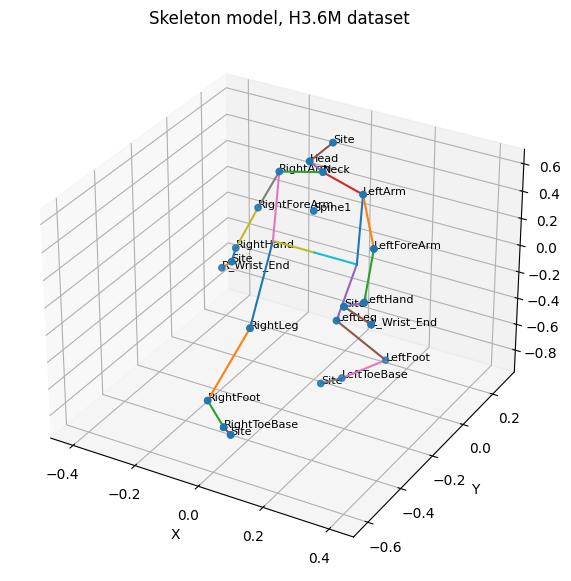

In [7]:
import conv_mixer.utils.visualization_helpers_h3m as visualization_helpers_h3m

visualization_helpers_h3m.visualize_batch_single_h3m(dataset_xyz[100])

![SegmentLocal](/home/azhuavlev/PycharmProjects/MotionMixerConv/conv_mixer/animation.gif "segment")

In [8]:
# Test gif generation, remove later

In [9]:
batch = dataset_xyz[100]

In [10]:
import numpy as np
# dim_used = np.array([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25,
#                     26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
#                     46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 64, 65, 66, 67, 68,
#                     75, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 89, 90, 91, 92])
# sequences_train = batch[0:25,
#                         dim_used].view(25, len(dim_used))

## Axis-angle format

The second possible format is axis-angle. Again, the global rotation and translation are removed (local movement), but we use less joints than in the xyz format. Train/validation/test splits and the number of sequences are the same.

In [11]:
dimensions_to_use_angle = np.array(
            [6, 7, 8, 9, 12, 13, 14, 15, 21, 22, 23, 24, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42,
             43, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86])
dimensions_to_ignore_angle = np.array(
            [0, 1, 2, 3, 4, 5, 10, 11, 16, 17, 18, 19, 20, 25, 26, 31, 32, 33, 34, 35, 48, 49, 50, 58,
              59, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
              98])
print('number of joints to use:', len(dimensions_to_use_angle) // 3)
print('number of joints to ignore:', len(dimensions_to_ignore_angle) //3)

number of joints to use: 16
number of joints to ignore: 17


In [12]:
dataset_angle = dataset_h36m_ang.H36M_Dataset_Angle(
    data_dir='/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses',
    input_n=100,
    output_n=100,
    skip_rate=2,
    split=0
)

In [13]:
batch_angle = dataset_angle[0][:, dimensions_to_use_angle]

print(batch_angle)
print('batch_angle.shape', batch_angle.shape)

[[ 0.3230213 -0.4831149 -0.0673216 ...  0.1473034 -0.1267874 -0.0072563]
 [ 0.3259532 -0.4838686 -0.0682784 ...  0.1349617 -0.0768555  0.0021032]
 [ 0.3294488 -0.4855806 -0.0695968 ...  0.1272881 -0.0470906  0.0103329]
 ...
 [ 0.5543316 -0.6687866  0.1618684 ...  0.1438099  0.2838625 -0.0268883]
 [ 0.5716785 -0.6677975  0.1498878 ...  0.1313288  0.2131509  0.0040503]
 [ 0.5799299 -0.7250111  0.1374053 ...  0.1095381  0.1248537  0.0352608]]
batch_angle.shape (200, 48)


## Dataset captured in AIS lab

The dataset captures 27 keypoints, of which only 19 are used. The data is provided in both xyz and axis-angle formats.

In [14]:
joints_ais = [
    "Nose", "Neck", "RShoulder", "RElbow", "RWrist", "LShoulder", "LElbow", "LWrist", "MidHip", "RHip", "RKnee",
    "RAnkle", "LHip", "LKnee", "LAnkle", "REye", "LEye", "REar", "LEar"
]
joints_ais_unused = [
    "Head", "Belly", "LBToe", "LSToe", "LHeel", "RBToe", "RSToe", "RHeel"
]

Input data format is JSON:

In [15]:
import json

in_file_name = "/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses/2021-08-04-singlePerson_000.json"
with open(in_file_name, 'r') as f:
    pose_data = json.load(f)
pose_data[0]['person']['keypoints'][0]

{'score': 3.3462276458740234,
 'pos': [-1.579332303842465, 5.254447240387596, 1.2453899554859404],
 'cov': [0.00028858751417853756,
  -0.00014108748570844474,
  9.386520816399225e-06,
  0.0012445461087687588,
  -0.0002077309460947308,
  0.00025123770636866134]}

Some joints have score of 0, they need to be ignored

In [16]:
pose_data[0]['person']['keypoints'][-1]

{'score': 0.0, 'pos': [0.0, 0.0, 0.0], 'cov': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

## Raw dataset

In [17]:
import conv_mixer.datasets.dataset_ais_xyz as dataset_ais_xyz
dataset_ais_raw = dataset_ais_xyz.DatasetAISxyz(
    data_dir="/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses",
    input_n=100,
    output_n=100,
    skip_rate=1,
    actions=[
        "2021-08-04-singlePerson_003",
    ],
    smoothing_alpha=0.99
)

*********************************
Reading action 2021-08-04-singlePerson_003
Total n of frames 1067
Failed to process 0 frames
indices of failed frames: 
Current n of sequences: 867


/scratch_net/manifoldnet/azhuavlev/conda_envs/neuman_kaolin/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/scratch_net/manifoldnet/azhuavlev/conda_envs/neuman_kaolin/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when crea

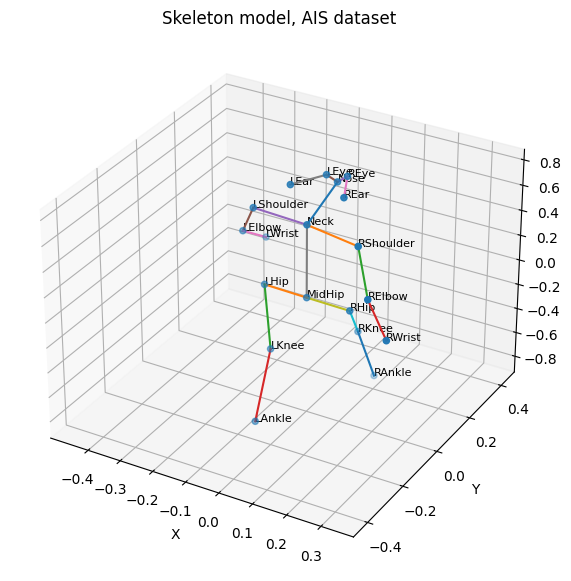

In [18]:
import conv_mixer.utils.visualization_helpers_ais
conv_mixer.utils.visualization_helpers_ais.visualize_batch_single_ais(dataset_ais_raw[510])

In [19]:
# import conv_mixer.visualization_helpers
conv_mixer.utils.visualization_helpers_ais.make_animation_ais(dataset_ais_raw[510], add_title=True, add_joint_names=True,
                                                          save_name='animation_ais_1')

![SegmentLocal](/home/azhuavlev/PycharmProjects/MotionMixerConv/conv_mixer/animation_ais_1.gif "segment")

## Smoothing with alpha=0.15

In [20]:
import conv_mixer.datasets.dataset_ais_xyz as dataset_ais_xyz
dataset_ais = dataset_ais_xyz.DatasetAISxyz(
    data_dir="/home/azhuavlev/Desktop/Data/CUDA_lab/VisionLabSS23_3DPoses",
    input_n=100,
    output_n=100,
    skip_rate=1,
    actions=[
        "2021-08-04-singlePerson_003",
    ],
    smoothing_alpha=0.15
)

*********************************
Reading action 2021-08-04-singlePerson_003
Total n of frames 1067
Failed to process 0 frames
indices of failed frames: 
Current n of sequences: 867


In [21]:
# import conv_mixer.visualization_helpers
conv_mixer.utils.visualization_helpers_ais.make_animation_ais(dataset_ais[510], add_title=True, add_joint_names=True,
                                                          save_name='animation_ais_015')

/scratch_net/manifoldnet/azhuavlev/conda_envs/neuman_kaolin/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/scratch_net/manifoldnet/azhuavlev/conda_envs/neuman_kaolin/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when crea

![SegmentLocal](/home/azhuavlev/PycharmProjects/MotionMixerConv/conv_mixer/animation_ais_015.gif "segment")